# Import Library

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy (Evaluate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Loading the train datasets

In [3]:
df_train = pd.read_csv('train_br.csv')

# EDA

In [4]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
df_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [6]:
df_train.shape

(7352, 563)

The dataset has 563 columns/features (including the target/class) and 7352 rows or data points. The target is Activity

# Checking for missing values in the dataset 

In [7]:
df_train.isnull().values.any()

False

# Class Distribution

In [8]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [9]:
pd.crosstab(index = df_train['Activity'],columns='count')

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


# Visualize the Class Distribution

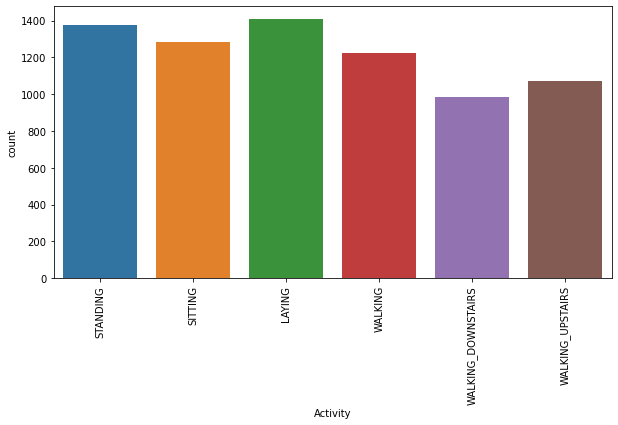

In [10]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Activity', data = df_train)
plt.xticks(x = df_train['Activity'], rotation='vertical')
plt.show()

1. Class Distribution is great, 
2. We can check for the feature 'subject' , we can drop or ignore the feature as it is the identifier of the subject who performed out the experiment. 

In [11]:
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

In [12]:
X = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
Y = df_train.Activity.values.astype(object)

X.shape, Y.shape

((7352, 561), (7352,))

In [13]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [14]:
Y[1]

'STANDING'

# Checking the datatypes of each feature

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [17]:
# Total number of Continuous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print('Number of numeric features:',num_cols.size)

Number of numeric features: 561


All features are of the float64 type and all 561 are numeric features, except for Class (y). We have to do Label Encoder and make it into numeric.

# Transforming non-numerical label into numerical label

In [18]:
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder()

In [19]:
#encoding train labels

encoder.fit(Y)
y = encoder.transform(Y)
y.shape

(7352,)

In [20]:
y[1]

2

In [21]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [22]:
encoder.classes_[2]

'STANDING'

# Feature Scaling 

In [23]:
# Scaling the feature

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X = scaler.fit_transform(X)
X[1]

array([ 0.05594788,  0.03148567, -0.25390836, -0.87542555, -0.92390168,
       -0.84930444, -0.86853066, -0.92199844, -0.84892814, -0.87135938,
       -0.89222832, -0.88919739,  0.89599818,  0.86865566,  0.76650295,
       -0.92069378, -0.69321044, -0.7751054 , -0.68758451, -0.84720186,
       -0.89918005, -0.82049508, -1.3048928 , -0.83019391, -1.09612841,
        2.37604697, -1.75325238,  1.32173624,  0.66992736,  0.55149006,
       -0.54554241,  0.64334534, -1.18164246,  0.26766528, -0.25635684,
       -0.22540599, -0.61013507,  0.30760857,  0.36578238,  1.23101989,
        0.5852968 , -0.40986684,  0.04445061, -0.42168323, -0.39103557,
        0.049352  , -0.42422787, -0.38623719,  0.04739076,  0.5644588 ,
       -0.43846821,  0.06881901,  0.60165647, -0.37364633,  0.06328303,
       -0.76084948,  0.67509357, -0.54965394, -0.53632953, -0.43123632,
       -0.36770227,  0.01296575, -0.91072978, -0.46503661,  1.19620895,
        0.4949101 , -0.67067971,  0.83501302, -0.9770558 ,  0.50

# Spliting X and y into training and validation sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 99)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 

((5881, 561), (1471, 561), (5881,), (1471,))

# Training the model

## Running SVM with default hyperparameters

In default hyperparameters, we have C = 1.0, kernel = rbf, and gamma = auto with other parameters

In [28]:
# Instantiate classifier with default hyperparameters
svc = SVC()

In [31]:
# fit classifier into training set
svc.fit(X_train,y_train)

SVC()

In [32]:
# make predictions on test set
y_pred = svc.predict(X_valid)

In [34]:
# computing and printing the accuracy score
print('Model accuracy score with deault hyperparmeters: {0:0.4f}'.format(accuracy_score(y_valid, y_pred)))

Model accuracy score with deault hyperparmeters: 0.9803


Here, y_valid are the true class labels and y_pred are the predicted class labels in the test-set.

# Running SVM with rbf kernel and c = 100.0

At times, there are outliers in the dataset, in that case, we increase the value of C as we know that the more high the value of C the fewer the outliers..

In [35]:
# Instantiate classifier with rbf kernel and C = 100.0
svc = SVC(C=100.0)

# fit classifier to training dataset
svc.fit(X_train, y_train)

# make predictions on test set
y_pred = svc.predict(X_valid)

# computing and printing the accuracy score
print('Model accuracy with rbf kernel and C=100.0 : {0:0.4f}' . format(accuracy_score(y_valid, y_pred)))

Model accuracy with rbf kernel and C=100.0 : 0.9918


Here, we obtained a higher accuracy with C=100.0 as higher C means less outliers, Now we will check for higher C value and find the accuracy.

# Running SVM with rbf kernel and C = 1000.0 

In [37]:
# instantiate classifier with rbf kernel and C = 1000.0
svc = SVC(C=1000.0)

# fit classifier to training dataset
svc.fit(X_train, y_train)

# make predictions on test set
y_pred = svc.predict(X_valid)

# computing and printing the accuracy score
print('Model accuracy with rbf kernel and C=1000.0 : {0:0.4f}' . format(accuracy_score(y_valid, y_pred)))

Model accuracy with rbf kernel and C=1000.0 : 0.9918


Accuracy is moreover  same as we had in C = 100.0, or we can say that it has decreased nominally. 

# Running SVM with linear kernel

Linear kernel with C = 1.0

In [39]:
# instantiate classifier with linear kernel and C = 1.0
linear_svc = SVC(kernel='linear', C=1.0)

# fit classifier to training dataset
linear_svc.fit(X_train, y_train)

# make predictions on the test set
y_pred = linear_svc.predict(X_valid)

# Computing and printing the accuracy score
print('Model accuracy with linear kernel and C = 1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy with linear kernel and C = 1.0 : 0.9844


# Running SVM with linear kernel and C = 100.0

In [41]:
# instantiate the classifier with linear kernel and C = 100.0
linear_svc = SVC(kernel='linear', C=100.0)

#fit classifier to training dataset
linear_svc.fit(X_train, y_train)

# make predictions on the test set
y_pred = linear_svc.predict(X_valid)

# computing and printing the accuracy
print('Model accuracy with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy with linear kernel and C=100.0 : 0.9803


# Running SVM with linear kernel and C = 1000.0

In [42]:
# instantiate the classifier with linear kernel and C = 1000.0
linear_svc = SVC(kernel='linear', C=1000.0)

#fit classifier to training dataset
linear_svc.fit(X_train, y_train)

# make predictions on the test set
y_pred = linear_svc.predict(X_valid)

# computing and printing the accuracy
print('Model accuracy with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy with linear kernel and C=100.0 : 0.9803


Here, we observe that we get higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0

# Comparing the train-set and test-set accuracy 

Comparing so as to check for overfitting.

In [43]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([5, 0, 1, ..., 2, 1, 1])

In [47]:
print('Training-set accuracy score : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score : 1.0000


We can see that training set and test-set accuracy are very much comparable.

# Checking for overfitting and underfitting

In [48]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Validation set score: {:.4f}'.format(linear_svc.score(X_valid, y_valid)))

Training set score: 1.0000
Validation set score: 0.9803


The training-set accuracy score is 100 while the validation-set accuracy to be 98.03. These two values are quite comparable. So, there is no overfitting.

# Running SVM with polynomial kernel and C = 1.0

In [57]:
# instantiate classifier with polynomial kernel with C = 1.0
poly_svc = SVC(kernel='poly', C=1.0)

#fit classifier to training set
poly_svc.fit(X_train, y_train)

#make prediction on test sets
y_pred = poly_svc.predict(X_valid)

#computing and printing the accuracy
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}' . format(accuracy_score(y_valid, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9721


# Running SVM with polynomial kernel and C = 100.0

In [58]:
# instantiate classifier with polynomial kernel with C = 100.0
poly_svc = SVC(kernel='poly', C=100.0)

#fit classifier to training set
poly_svc.fit(X_train, y_train)

# make prediction on test sets
y_pred = poly_svc.predict(X_valid)

# computing and printing the accuracy
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}' . format(accuracy_score(y_valid, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9878


Polynomial kernel gives poor performance, it may be overfitting the dataset.

# Running SVM with sigmoid kernel  

In [59]:
# instantiate classifier with sigmoid kernel with C = 1.0
sigmoid_svc = SVC(kernel='sigmoid', C=1.0)

# fit classifier to training set
sigmoid_svc.fit(X_train, y_train)

# make prediction on test sets
y_pred = sigmoid_svc.predict(X_valid)

#computing and printing the accuracy
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}' . format(accuracy_score(y_valid, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8946


# Running SVM with sigmoid kernel with C = 100.0

In [60]:
# instantiate classifier with sigmoid kernel with C = 100.0
sigmoid_svc = SVC(kernel='sigmoid', C=100.0)

# fit classifier to training set
sigmoid_svc.fit(X_train, y_train)

# make prediction on test sets
y_pred = sigmoid_svc.predict(X_valid)

#computing and printing the accuracy
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}' . format(accuracy_score(y_valid, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8477


We can see that is also performing poorly like polynomial kernel

# Hyperparameter tuning using grid search and cross validation

In [61]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel':['rbf'], 'gamma': [1e-3, 1e-4],
                'C': [1,10,100,1000]}, 
               {'kernel': ['linear'], 'C': [1,10,100,1000]}]

In [76]:
# Performing CV to tune parameters for best SVM fit
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

# Confusion Matrix and Accuracy Score

In [79]:
# view the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# view the best parameter for the model using grid search
print('Best C:', svm_model.best_estimator_.C,"\n")
print('Best kernel:', svm_model.best_estimator_.kernel,"\n")
print('Best gamma:', svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_valid)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.983846716256596 

Best C: 100 

Best kernel: rbf 

Best gamma: 0.001 



In [80]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_valid,Y_pred))
print("\n")
print(classification_report(y_valid,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Validation set score for SVM: %f" % final_model.score(X_valid  , y_valid ))

# svm_model.score

[[249   0   0   0   0   0]
 [  0 272   5   0   0   0]
 [  0   9 284   0   0   0]
 [  0   0   0 251   0   0]
 [  0   0   0   0 186   0]
 [  0   0   0   0   0 215]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.97      0.98      0.97       277
           2       0.98      0.97      0.98       293
           3       1.00      1.00      1.00       251
           4       1.00      1.00      1.00       186
           5       1.00      1.00      1.00       215

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471

Training set score for SVM: 1.000000
Validation set score for SVM: 0.990483


# Final observation

It is seen that we obtain maximum accuracy with rbf and linear kernels, with C = 100.0, the above model is having great 
accuracy and predicting the class labels.